<a href="https://colab.research.google.com/github/JVG4M35/Entropia/blob/main/PCA_Instancia_reduzida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do seu arquivo .xlsx:


Saving 2020_base_atual.xlsx to 2020_base_atual (2).xlsx
Arquivo carregado: 2020_base_atual (2).xlsx
Primeiras 5 linhas do DataFrame:
   competencia  municipios  admissoes  desligamentos  saldo_movimentacao
0         2020      350010       3120           3431                -311
1         2020      350020        308            256                  52
2         2020      350030       2801           2627                 174
3         2020      350040        450            522                 -72
4         2020      350050       1342           1514                -172

DataFrame com as 3 últimas colunas (admissões, desligamentos, saldo):
   admissoes  desligamentos  saldo
0       3120           3431   -311
1        308            256     52
2       2801           2627    174
3        450            522    -72
4       1342           1514   -172

Matriz de Covariância:
[[1.00671141 1.00645381 0.9599312 ]
 [1.00645381 1.00671141 0.95282429]
 [0.9599312  0.95282429 1.00671141]]

Autovalores:
[

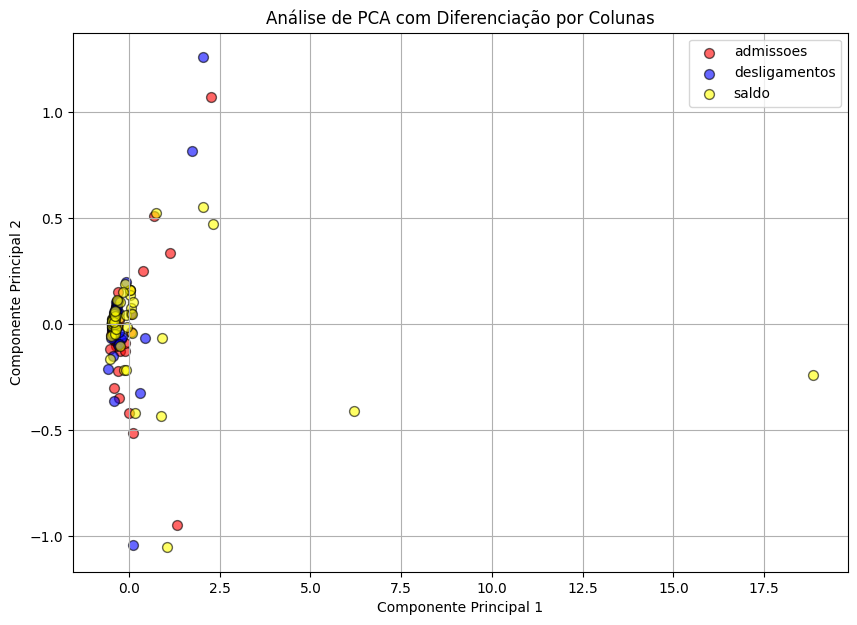

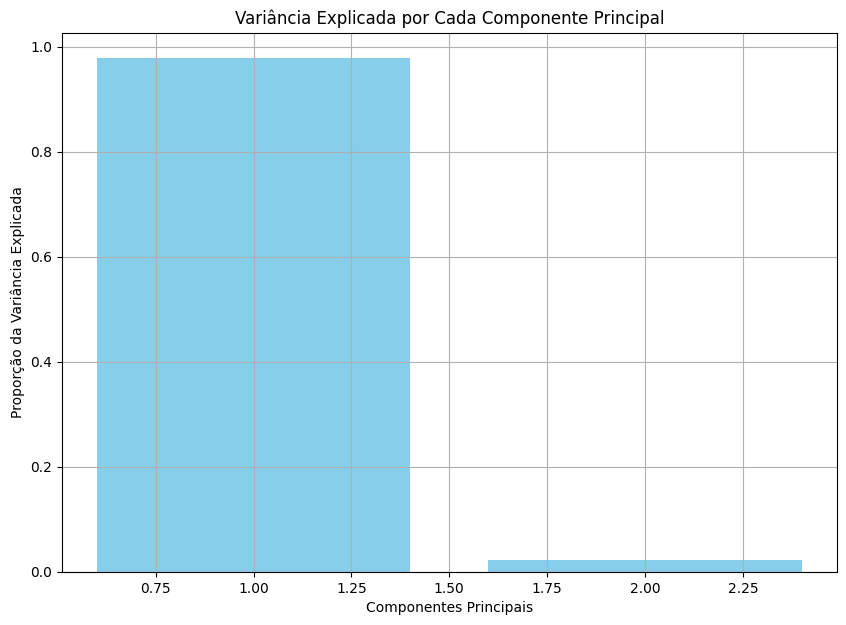

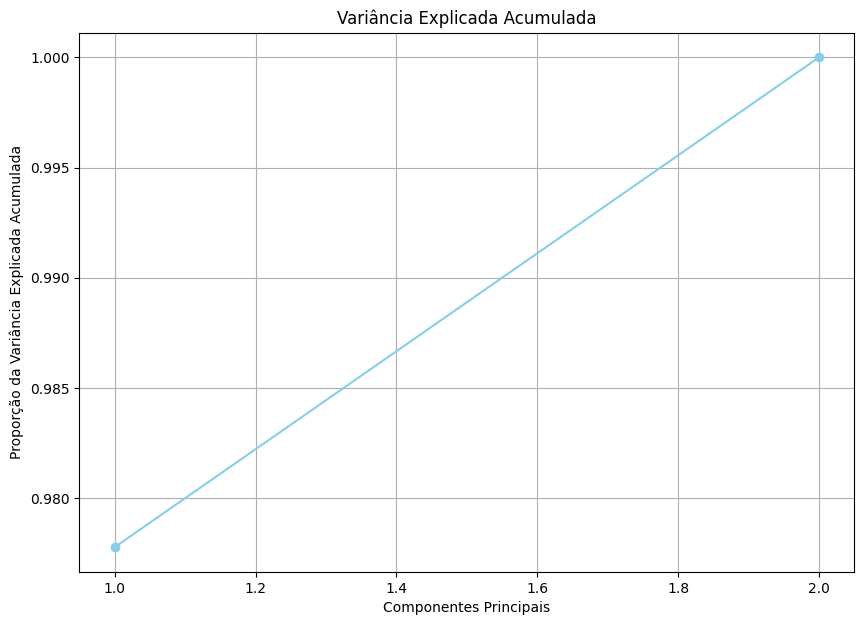


DataFrame com Componentes Principais:
        PC1       PC2
0 -0.242697 -0.126315
1 -0.364938 -0.103229
2 -0.448489  0.024161
3 -0.478828 -0.027528
4 -0.415888  0.001462


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Carregar arquivo .xlsx
print("Faça upload do seu arquivo .xlsx:")
uploaded = files.upload()

# Verificar o nome do arquivo carregado
file_name = list(uploaded.keys())[0]
print(f"Arquivo carregado: {file_name}")

# Ler o arquivo .xlsx
data = pd.read_excel(file_name)

# Exibir primeiras linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
print(data.head())

# Selecionar as 3 últimas colunas
X = data.iloc[:, -3:]
X.columns = ['admissoes', 'desligamentos', 'saldo']

# Exibir primeiras linhas do DataFrame selecionado
print("\nDataFrame com as 3 últimas colunas (admissões, desligamentos, saldo):")
print(X.head())

# Limitar a análise a 150 instâncias aleatórias
X = X.sample(n=150, random_state=42)

# Identificar colunas numéricas e não numéricas
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Exibir colunas com valores não numéricos
if len(non_numeric_columns) > 0:
    print("\nColunas com valores não numéricos:")
    for column in non_numeric_columns:
        print(f"{column}: {X[column].unique()}")

# Imputar valores ausentes para colunas numéricas
if len(numeric_columns) > 0:
    numeric_imputer = SimpleImputer(strategy='mean')
    X[numeric_columns] = numeric_imputer.fit_transform(X[numeric_columns])

# Codificar colunas não numéricas
if len(non_numeric_columns) > 0:
    from sklearn.preprocessing import OneHotEncoder
    non_numeric_imputer = SimpleImputer(strategy='most_frequent')
    X[non_numeric_columns] = non_numeric_imputer.fit_transform(X[non_numeric_columns])

    # One-Hot Encoding para variáveis categóricas
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    X_encoded = pd.DataFrame(encoder.fit_transform(X[non_numeric_columns]), columns=encoder.get_feature_names_out(non_numeric_columns))

    # Concatenar as colunas codificadas com as colunas numéricas
    X = pd.concat([pd.DataFrame(X[numeric_columns], columns=numeric_columns), X_encoded], axis=1)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calcular e imprimir a matriz de covariância
cov_matrix = np.cov(X_scaled.T)
print("\nMatriz de Covariância:")
print(cov_matrix)

# Calcular e imprimir os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

# Ordenar os autovalores e autovetores em ordem decrescente
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar os dois maiores autovalores e autovetores
top_eigenvalues = [pair[0] for pair in eigen_pairs[:2]]
top_eigenvectors = [pair[1] for pair in eigen_pairs[:2]]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

# Visualizar os resultados
plt.figure(figsize=(10, 7))
colors = ['red', 'blue', 'yellow']
column_names = ['admissoes', 'desligamentos', 'saldo']

# Para plotar as diferentes colunas, precisamos de dados rotulados para as cores
# Suponha que tenhamos a mesma quantidade para cada categoria
num_samples = X_pca.shape[0] // 3
for i, col in enumerate(column_names):
    plt.scatter(X_pca[i*num_samples:(i+1)*num_samples, 0], X_pca[i*num_samples:(i+1)*num_samples, 1],
                color=colors[i], label=col, edgecolor='k', s=50, alpha=0.6)

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA com Diferenciação por Colunas')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

# Plotagem da variância explicada
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue')
plt.title('Variância Explicada por Cada Componente Principal')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.grid(True)
plt.show()

# Plotagem da variância explicada acumulada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='skyblue')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada Acumulada')
plt.grid(True)
plt.show()

# Exibir DataFrame com componentes principais
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print("\nDataFrame com Componentes Principais:")
print(df_pca.head())
